# Scikit HEP

Ecosistema en python para física de altas energías

https://scikit-hep.org/

## Uproot

Uproot es una biblioteca para leer y escribir archivos ROOT en Python utilizando NumPy.

https://uproot.readthedocs.io/en/latest/index.html

puedes ser un archivo, local, o en algun servidor ("http://where/what.root") o en formato zip


In [2]:
import uproot
import numpy as np

file= uproot.open("../datasets/uproot-Event.root")

file.classnames() # get a list of contents 
#file["T"].keys()
#file["T"]["event"].show()

{'ProcessID0;1': 'TProcessID',
 'htime;1': 'TH1F',
 'T;1': 'TTree',
 'hstat;1': 'TH1F'}

### **TH1F** son histogramas y **TTree** son datos estructurados

### Abrir gráfica. 

Uproot no grafica, pero se puede trasladar la información a otra clse, como **to_hist(), to_numpy(),...**

array([14., 18., 14., 11., 15., 13., 12., 13.,  8.,  8.,  9., 10., 10.,
        7.,  8., 10.,  8., 12.,  6.,  8.,  7.,  9., 10., 12., 10., 11.,
       10., 10., 10.,  8., 14., 13.,  9.,  7., 12., 10.,  7.,  6.,  9.,
       13., 11.,  8., 10.,  9.,  7.,  4.,  7., 10.,  8.,  8.,  9.,  9.,
        7., 12., 11.,  9., 10.,  7., 10., 13., 13., 11.,  9.,  9.,  8.,
        8., 10., 12.,  7.,  5.,  9., 10., 12., 13., 10., 14., 10., 10.,
        8., 12., 12., 11., 16., 12.,  8., 12.,  7.,  9.,  9.,  7., 10.,
        7., 11., 11.,  8., 13.,  9.,  8., 14., 16.], dtype=float32)

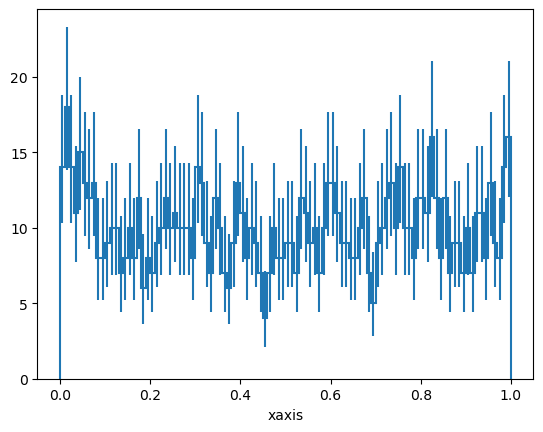

In [3]:
h = file["hstat"]
h.to_hist().plot()
h.values()


### Abrir datos:

In [4]:
t = file["T"]
t.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
event                | Event                    | AsGroup(<TBranchElement 'ev...
event/TObject        | (group of fUniqueID:u... | AsGroup(<TBranchElement 'TO...
event/TObject/fUn... | uint32_t                 | AsDtype('>u4')
event/TObject/fBits  | uint32_t                 | AsDtype('>u4')
event/fType[20]      | int8_t[20]               | AsDtype("('i1', (20,))")
event/fEventName     | char*                    | AsStrings(length_bytes='4')
event/fNtrack        | int32_t                  | AsDtype('>i4')
event/fNseg          | int32_t                  | AsDtype('>i4')
event/fNvertex       | uint32_t                 | AsDtype('>u4')
event/fFlag          | uint32_t                 | AsDtype('>u4')
event/fTemperature   | float                    | AsDtype('>f4', 'float64')
event/fMeasures[10]  | int32_t[10]              | AsDtype

In [5]:
#t.keys()
t["event/fNtrack"]
#t["event/fNtrack"].typename
#t["event/fNtrack"].interpretation

<TBranchElement 'fNtrack' at 0x7f947e04df90>

El método mas directo de leer un archivo de datos es con la función **array**

In [6]:
t["event/fNtrack"].array()

<Array [600, 604, 603, 594, 595, ..., 598, 600, 596, 593] type='1000 * int32'>

In [7]:
tree = t['event']
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
event                | Event                    | AsGroup(<TBranchElement 'event
TObject              | (group of fUniqueID:u... | AsGroup(<TBranchElement 'TO...
TObject/fUniqueID    | uint32_t                 | AsDtype('>u4')
TObject/fBits        | uint32_t                 | AsDtype('>u4')
fType[20]            | int8_t[20]               | AsDtype("('i1', (20,))")
fEventName           | char*                    | AsStrings(length_bytes='4')
fNtrack              | int32_t                  | AsDtype('>i4')
fNseg                | int32_t                  | AsDtype('>i4')
fNvertex             | uint32_t                 | AsDtype('>u4')
fFlag                | uint32_t                 | AsDtype('>u4')
fTemperature         | float                    | AsDtype('>f4', 'float64')
fMeasures[10]        | int32_t[10]              | AsDtype

In [8]:
tracks = tree["fTracks"]
tracks.show()


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
fTracks              | TClonesArray*            | AsGroup(<TBranchElement 'fTrac
fTracks.fUniqueID    | uint32_t[]               | AsJagged(AsDtype('>u4'))
fTracks.fBits        | uint32_t[]               | AsJagged(AsDtype('>u4'))
fTracks.fPx          | float[]                  | AsJagged(AsDtype('>f4'))
fTracks.fPy          | float[]                  | AsJagged(AsDtype('>f4'))
fTracks.fPz          | float[]                  | AsJagged(AsDtype('>f4'))
fTracks.fRandom      | float[]                  | AsJagged(AsDtype('>f4'))
fTracks.fMass2       | Float16_t[]              | AsJagged(AsFloat16(0.0, 0.0...
fTracks.fBx          | Float16_t[]              | AsJagged(AsFloat16(0.0, 0.0...
fTracks.fBy          | Float16_t[]              | AsJagged(AsFloat16(0.0, 0.0...
fTracks.fMeanCharge  | float[]                  | AsJagged(AsDty

In [9]:
#file["T"]["event"]["fTracks.fPx"]
file["T/event/fTracks.fPx"]


<TBranchElement 'fTracks.fPx' at 0x7f947e07cbd0>

In [10]:
chg = file["T/event/fTracks.fCharge"]
px = file["T/event/fTracks.fPx"]
py = file["T/event/fTracks.fPy"]
pz = file["T/event/fTracks.fPz"]
pt = np.sqrt(px.array(entry_start=1, entry_stop=20) ** 2 + py.array(entry_start=1, entry_stop=20)**2)
pt


<Array [[2.17, 1.46, 1.45, ..., 0.613, 1.71], ...] type='19 * var * float32'>

(array([4.78891e+05, 9.63820e+04, 1.93400e+04, 3.81200e+03, 7.77000e+02,
        1.46000e+02, 3.30000e+01, 7.00000e+00, 3.00000e+00, 1.00000e+00]),
 array([9.73232162e-08, 3.21076822e+00, 6.42153645e+00, 9.63230419e+00,
        1.28430729e+01, 1.60538406e+01, 1.92646084e+01, 2.24753761e+01,
        2.56861458e+01, 2.88969135e+01, 3.21076813e+01]),
 <BarContainer object of 10 artists>)

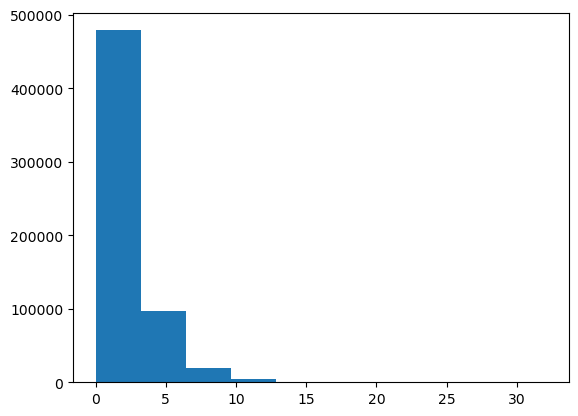

In [11]:
import awkward as ak
import matplotlib.pyplot as plt

pt = ak.flatten(px.array() ** 2 + py.array() ** 2)
plt.hist(pt)


# UrQMD

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3.90972906, -2.96378727, -2.01784549, -1.07190371, -0.12596192,
         0.81997986,  1.76592165,  2.71186343,  3.65780522,  4.603747  ,
         5.54968878]),
 <a list of 11141 BarContainer objects>)

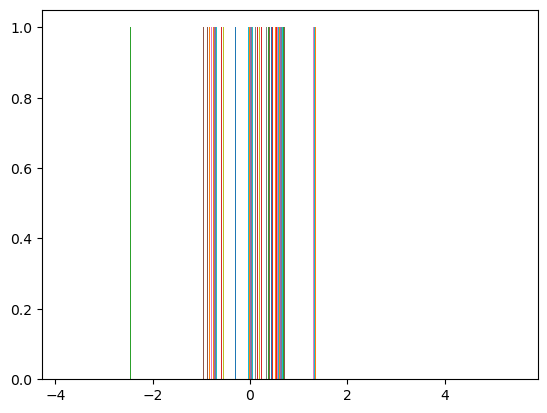

In [12]:
file2= uproot.open("../datasets/test.f13.root")
branches = file2["events/event"]
#branches.show()
px2 = branches['fParticles.fPx'].array(entry_start=0, entry_stop=1000)
py2 = branches['fParticles.fPy'].array(entry_start=0, entry_stop=1000)
pz2 = branches['fParticles.fPz'].array(entry_start=0, entry_stop=1000)

p2 = np.sqrt(px2 ** 2 + py2 ** 2 + pz2 ** 2)
pt2 = np.sqrt(px2 ** 2 + py2 ** 2)
eta2 = 0.5*np.log((p2+px2)/(p2-px2))

proton = branches['fParticles.fPdg'] == 2212
pion = branches['fParticles.fPdg'] == 211
kaon = branches['fParticles.fPdg'] == 321
plt.hist(eta2)


In [13]:
p = np.sqrt((branches['fParticles.fPx'].array()*branches['fParticles.fPx']).array() + (branches['fParticles.fPy'].array()*branches['fParticles.fPy'].array) + (branches['fParticles.fPz']*branches['fParticles.fPz']))
pt = np.sqrt((branches['fParticles.fPx']*branches['fParticles.fPx']) + (branches['fParticles.fPy']*branches['fParticles.fPy']))
eta = 0.5*np.log((p+branches['fParticles.fPx'])/(p-branches['fParticles.fPx']))
proton = branches['fParticles.fPdg'] == 2212
pion = branches['fParticles.fPdg'] == 211
kaon = branches['fParticles.fPdg'] == 321

ak.flatten(pt[proton])

AttributeError: no field named 'array'

TypeError: only integers, slices (`:`), ellipsis (`...`), np.newaxis (`None`), integer/boolean arrays (possibly with variable-length nested lists or missing values), field name (str) or names (non-tuple iterable of str) are valid indices for slicing, not

    False

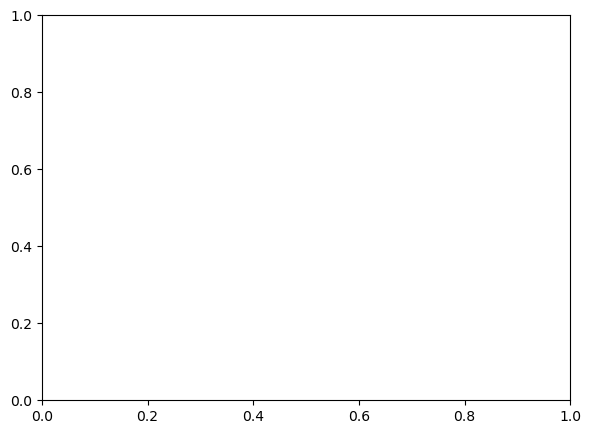

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(ak.flatten(pt[pion]), bins=100, range=(0, 10),label='p')
plt.hist(ak.flatten(pt[proton]), bins=100, range=(0, 10),label='$\pi^+$')
plt.hist(ak.flatten(pt[kaon]), bins=100, range=(0, 10),label='$K^+$')
plt.title('No selection')
plt.xlabel('$p_T$ [GeV]')
plt.ylabel('Entries')
plt.yscale('log')
plt.legend()
plt.subplot(1,2,2)
plt.hist(ak.flatten(eta[pion]))
plt.hist(ak.flatten(eta[proton]))
plt.hist(ak.flatten(eta[kaon]))
plt.title('No selection')
plt.xlabel('$\eta$')
plt.ylabel('Entries')
plt.show()


In [ ]:
print('Mean Transverse momentum pions:',np.mean(ak.flatten(pt[pion])))
print('Mean Transverse momentum protons:',np.mean(ak.flatten(pt[proton])))
#infile= uproot.open("test.f13.root:events")
print('Mean Transverse momentum kaons:',np.mean(ak.flatten(pt[kaon])))


TypeError: only integers, slices (`:`), ellipsis (`...`), np.newaxis (`None`), integer/boolean arrays (possibly with variable-length nested lists or missing values), field name (str) or names (non-tuple iterable of str) are valid indices for slicing, not

    False